In [ ]:
# 2일차 수업을 위한 추가 모듈 설치
!pip install torchinfo JAEN -qU

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 647.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 827.8/827.8 kB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.5/174.5 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 44.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 71.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 397.0/397.0 kB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.7/383.7 kB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.1/71.1 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.5/51.5 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 55.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76

# 활성화 함수

In [ ]:
import torch
from JAEN.utils import plot_activation_function

## sigmoid

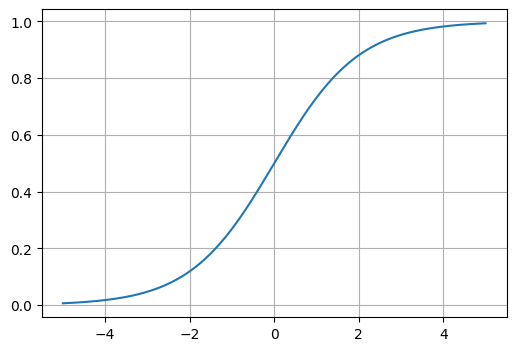

In [ ]:
def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

plot_activation_function(sigmoid)

## tanh

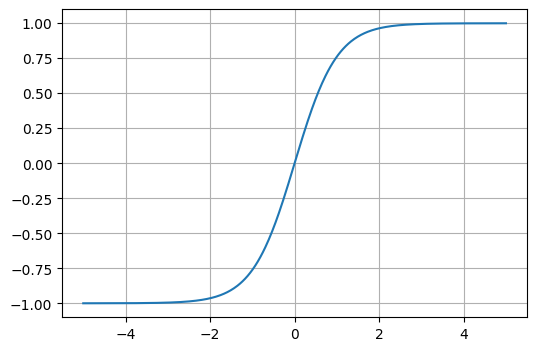

In [ ]:
def tanh(x):
    return (torch.exp(x) - torch.exp(-x)) / (torch.exp(x) + torch.exp(-x))

plot_activation_function(tanh)

## relu

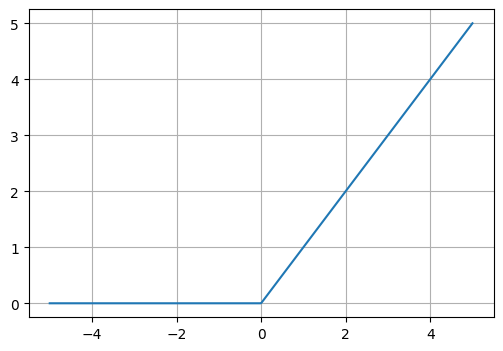

In [ ]:
def relu(x):
    return torch.maximum(torch.tensor(0.0), x)

plot_activation_function(relu)

## leaky relu

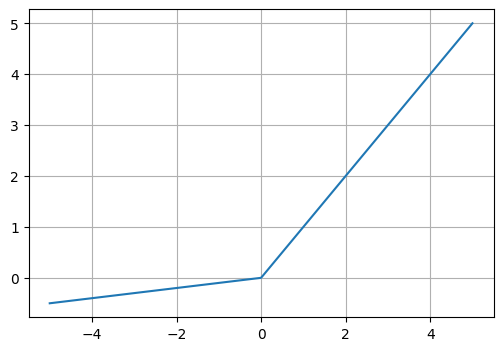

In [ ]:
def leaky_relu(x, alpha=0.1):
    return torch.where(x > 0, x, alpha * x)

plot_activation_function(leaky_relu)

## elu

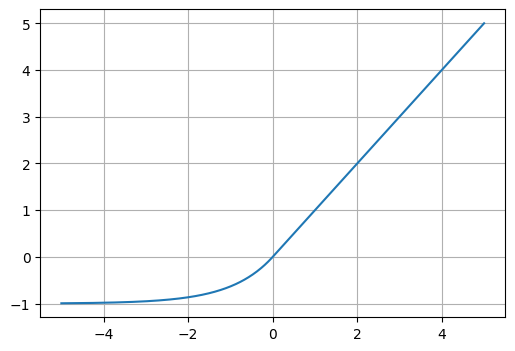

In [ ]:
def elu(x, alpha=1.0):
    return torch.where(x > 0, x, alpha * (torch.exp(x) - 1))

plot_activation_function(elu)

## 자동미분

In [ ]:
import torch

In [ ]:
# requires_grad=True로 설정된 텐서 생성
x = torch.tensor([2.0, 3.0], requires_grad=True)
x

tensor([2., 3.], requires_grad=True)

In [ ]:
# 텐서의 연산
y = x ** 2  # y = [4, 9]
z = y.sum()  # z = 13
#x1과 x2로 z편미분하면 2x1 , 2x2 가 나온다 각각.
# 역전파 수행
z.backward()
z

tensor(13., grad_fn=<SumBackward0>)

In [ ]:
x.grad

tensor([4., 6.])

In [ ]:
# x에 대한 z의 그래디언트 (z가 x에 대해 어떻게 변화하는지를 계산, 편미분 수행)
# 출력: tensor([4., 6.])
x.grad

# z = x1^2 + x2^2
# dz/dx1 = 2 * x1 = 2 * 2 = 4
# dz/dx2 = 2 * x2 = 2 * 3 = 6

tensor([4., 6.])

# 데이터 로더

In [ ]:
import torch
from torch.utils.data import DataLoader, Dataset
#배치크기는 메모리가 증량된다면 배치크기를 크게 가져가도됨.

In [ ]:
#AllenHearcore/AQOURSNet_rsch22su
class CustomDataset(Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]

In [ ]:
# 예시 데이터
data = torch.randn(100, 3)  # 100개의 샘플, 각 샘플은 3차원 벡터
labels = torch.randint(0, 2, (100,))  # 이진 분류를 위한 100개의 레이블

# 데이터셋 및 DataLoader(배치 크기3) 생성
dataset = CustomDataset(data, labels)
dataloader = DataLoader(dataset, batch_size=3)

In [ ]:
# DataLoader에서 모든 배치를 리스트로 변환
all_batches = list(dataloader)
batch_data, batch_labels = all_batches[0] # 첫번째 배치 조회
batch_data, batch_labels

(tensor([[ 3.9528e-01,  7.3056e-01,  1.3438e+00],
         [ 4.5508e-01,  5.9973e-01, -1.8585e+00],
         [ 9.6806e-02, -1.3466e+00,  1.4118e-03]]),
 tensor([0, 0, 1]))

In [ ]:
batch_data, batch_labels = all_batches[-1] # 마지막 배치 조회
batch_data, batch_labels

(tensor([[-0.9264,  1.3183, -1.0203]]), tensor([1]))

In [ ]:
# DataLoader(배치 크기7) 생성
dataloader = DataLoader(dataset, batch_size=7)
all_batches = list(dataloader)
batch_data, batch_labels = all_batches[-1] # 마지막 배치 조회
batch_data, batch_labels

(tensor([[ 0.5489,  0.0454, -1.5464],
         [-0.9264,  1.3183, -1.0203]]),
 tensor([0, 1]))

In [ ]:
# DataLoader(배치 크기7, 셔플 설정) 생성
dataloader =  DataLoader(dataset, batch_size=7, shuffle=True)
all_batches = list(dataloader)
batch_data, batch_labels = all_batches[-1] # 마지막 배치 조회
batch_data, batch_labels

(tensor([[ 0.7007,  1.0692,  2.2064],
         [-0.2023,  0.1195,  0.6528]]),
 tensor([1, 0]))

In [ ]:
# DataLoader(배치 크기7, 셔플 설정, 마지막 배치 드랍 설정) 생성
dataloader = DataLoader(dataset, batch_size=7, shuffle=True, drop_last=True)
all_batches = list(dataloader)
batch_data, batch_labels = all_batches[-1] # 마지막 배치 조회
batch_data, batch_labels

(tensor([[ 1.0431,  0.0738, -1.0267],
         [-0.7317, -1.5569,  0.7089],
         [-0.3501,  0.4448,  1.9142],
         [ 0.3953,  0.7306,  1.3438],
         [ 0.7340,  1.8983,  2.7266],
         [ 0.5516, -0.8969,  0.4986],
         [ 0.2518,  0.1373, -0.3185]]),
 tensor([0, 1, 0, 0, 0, 0, 1]))

## 모듈 import

In [ ]:
!pip install torchinfo JAEN -qU
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torchinfo import summary
from JAEN.utils import plot_training_results

# device 설정 (GPU가 사용 가능하면 GPU로, 그렇지 않으면 CPU 사용)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

# 심층신경망 - FashionMNIST
- Fashion-MNIST는 머신러닝과 딥러닝에서 이미지 분류 작업을 수행할 때 자주 사용되는 벤치마크 데이터세트
    - Zalando라는 독일의 온라인 패션 소매업체에서 제공하는 의류와 액세서리 이미지를 사용
- MNIST 데이터세트(숫자 손글씨 이미지 데이터세트)을 대체하거나 보완하기 위해 만들어졌으며, 패션 아이템에 대한 이미지로 구성
    - 훈련 데이터: 60,000개의 훈련 샘플
    - 테스트 데이터: 10,000개의 테스트 샘플
    - 이미지 크기: 28x28 픽셀의 회색조 이미지 (Grayscale)
    - 클래스 수: 10개의 서로 다른 패션 아이템
    - 클래스 이미지 채널: 단일 채널 (Grayscale)

| 클래스 번호 | 클래스 이름  | 한국어 설명     |
|-------------|--------------|----------------|
| 0           | T-shirt/top  | 티셔츠/탑      |
| 1           | Trouser      | 바지           |
| 2           | Pullover     | 풀오버 (스웨터)|
| 3           | Dress        | 드레스         |
| 4           | Coat         | 코트           |
| 5           | Sandal       | 샌들           |
| 6           | Shirt        | 셔츠           |
| 7           | Sneaker      | 스니커즈       |
| 8           | Bag          | 가방           |
| 9           | Ankle boot   | 앵클 부츠      |

![](https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/fashion-mnist-sprite.png)

## 데이터 로드

In [ ]:
# 데이터 변환 (이미지를 텐서로 변환하고 [0, 1] 범위로 정규화) transform은 이미지 데이터일때 활용함. 전처리과정
transform = transforms.Compose([
    transforms.ToTensor(), #jpg같은 이미지 파일을 텐서로 변환함.
    transforms.Normalize((0.5,), (0.5,))  # 이미지의 평균과 표준편차로 정규화
])

In [ ]:
# 학습 및 테스트 데이터셋 로드
train_dataset = datasets.FashionMNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.FashionMNIST(root='./data', train=False, transform=transform, download=True)

100%|██████████| 26421880/26421880 [00:01<00:00, 13321472.58it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 214529.48it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3917083.30it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 17055511.05it/s]


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [ ]:
type(train_dataset)
#torch가 가지고있는 데이터 set타입이다. torchvision.datasets.mnist.FashionMNIST 그래서 따로 customdataset class가 필요없다

torchvision.datasets.mnist.FashionMNIST

In [ ]:
# 데이터 로더 생성
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True) #64장 사진씩 가져온다.
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False) #테스트 데이터의 batch사이지는 상관이 없다 속도에만 차이가 있을뿐

In [ ]:
#첫번째 배치
image, label = next(iter(train_loader))
image.shape, label.shape

(torch.Size([64, 1, 28, 28]), torch.Size([64]))

In [ ]:
# 4D Tensor
# (64, 1, 28, 28)
# (배치크기, 채널(1이면 흑백, 3이면 컬러), 이미지 높이, 이미지 너비)
# nn.Linear > 2D Tensor (input), 2D Tensor (output) > (배치크기, 특성)
# dnn은 2d tensor를 받기때문에 4차원 데이터를 2차원을로 줄여야한다.
# 이걸 이제 (배치크기, 특성(1*28*2)) 형태로 변경해줘서 2d로 만들어준다.
# 입력층에 2d로 만들어 입력층은 2d로 만들고 은닉층 의 nn.linear에 2d인풋을 만족시켜준다.

In [ ]:
# 4차원 텐서 예시 (배치 크기 1, 채널 1, 높이 2, 너비 2)
x = torch.tensor([[[[1, 2], [3, 4]]]])
flatten = nn.Flatten() # Flatten 모듈 생성
output = flatten(x) # Flatten 적용
output# 출력 텐서: [[1, 2, 3, 4]]

tensor([[1, 2, 3, 4]])

## 심층신경망 모델 정의

In [ ]:
model = nn.Sequential()
model.add_module('flatten',nn.Flatten()) # Flatten 모듈 추가 이렇게 추가해도되고 아님 아래처럼 한번에도 가능

model = nn.Sequential(
    nn.Flatten(), #입력층
    nn.Linear(28*28, 128), #은닉층
    nn.ReLU(), #활성화함수
    nn.Linear(128, 10) #출력층 그리고 그 뒤에 활성화 함수 정의하지 않음
)

#출력층의 활성화 함수
# 회귀 문제 - 출력층에 활성화 함수를 지정하지 않음 값 그대로 사용
# 분류 문제
# - 이진 분류 : sigmoid 사용, 출력층 뉴런 수 1개 ( nn.Linear(128,1),nn.sigmoid())
# - 다중 분류 : 활성화 함수 사용 X (torch만), 출력층 뉴런 수 N(범주개수)개
#             : crossentropyloss가 softmax를 내장

# 모델 인스턴스 생성
model = model.to(device)
# (모델,인풋데이터shape)
summary(model, (10, 1, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
Sequential                               [10, 10]                  --
├─Flatten: 1-1                           [10, 784]                 --
├─Linear: 1-2                            [10, 128]                 100,480
├─ReLU: 1-3                              [10, 128]                 --
├─Linear: 1-4                            [10, 10]                  1,290
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
Total mult-adds (M): 1.02
Input size (MB): 0.03
Forward/backward pass size (MB): 0.01
Params size (MB): 0.41
Estimated Total Size (MB): 0.45

In [ ]:
# 입력층 (Flatten) > 28*28
# 첫번째 은닉층 > 뉴런 256, 활성화함수 relu
# 두번째 은닉층 > 뉴런 256, 활성화 함수 relu
# 출력층 > 뉴런 10, 활성화 함수 x
# 레이어에 뭐를 넣는지에 따라서 그게 tranformer~ gan, rnn, 이런식으로 변형된다.
model2 = nn.Sequential(
    nn.Flatten(), #입력층
    nn.Linear(28*28, 256), #은닉층
    nn.ReLU(), #활성화함수
    nn.Linear(256, 256), #은닉층
    nn.ReLU(), #활성화함수 #양수 즉 제대로 나온 결과만 사용하고 음수는 0으로 버리는 함수
    nn.Linear(256, 10) #출력층 그리고 그 뒤에 활성화 함수 정의하지 않음
)
summary(model2, (10, 1, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
Sequential                               [10, 10]                  --
├─Flatten: 1-1                           [10, 784]                 --
├─Linear: 1-2                            [10, 256]                 200,960
├─ReLU: 1-3                              [10, 256]                 --
├─Linear: 1-4                            [10, 256]                 65,792
├─ReLU: 1-5                              [10, 256]                 --
├─Linear: 1-6                            [10, 10]                  2,570
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
Total mult-adds (M): 2.69
Input size (MB): 0.03
Forward/backward pass size (MB): 0.04
Params size (MB): 1.08
Estimated Total Size (MB): 1.15

In [ ]:
class FashionMNISTModel(nn.Module):
    def __init__(self):  #초기화 함수에 레이어를 정의해야함
        super(FashionMNISTModel, self).__init__() #부모클래스 초기화 추가해야함 (필수)

        #레이어 정의 레이어 이름은 자유
        self.input_layer = nn.Flatten()           #입력층 (4d tensor > 2d tensor 변환)
        self.hidden_layer = nn.Linear(28*28, 128) #은닉층 (28 * 28 입력, 128 출력)
        self.output_layer = nn.Linear(128, 10)    #출력층 (128 입력, 10출력)
        # self.relu = nn.ReLU()

    #순전파 과정을 정의해야함 > 입력층부터 출력층까지 연결을 정의해야함 x가 뉴럴네트워크에 들어오는 입력값
    def forward(self, x):
        x = self.input_layer(x) #input_layer에 입력값x를 넣음 > 출력밧에 x다시 저장 #2d 텐서 > flatten
        x = self.hidden_layer(x) #hidden_layer에 input_layer의 출력값을 넣어줌 그리고 128개의 특징 추출
        x = torch.relu(x) #은닉층의 결과에 relu 활성화 함수 적용
        # x는 2d tensor > 입력 데이터에서 추출한 128개의 특징
        x = self.output_layer(x) #추출된 128개의 특징을 output_layer에 넣어줌 > 10개의 결과가 추출
        # 각범주 10개의 확률

        return x



# 모델 인스턴스 생성
model = FashionMNISTModel().to(device)
summary(model, (10, 1, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
FashionMNISTModel                        [10, 10]                  --
├─Flatten: 1-1                           [10, 784]                 --
├─Linear: 1-2                            [10, 128]                 100,480
├─Linear: 1-3                            [10, 10]                  1,290
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
Total mult-adds (M): 1.02
Input size (MB): 0.03
Forward/backward pass size (MB): 0.01
Params size (MB): 0.41
Estimated Total Size (MB): 0.45

In [ ]:
def train(model, train_loader, criterion, optimizer, epoch, device):
    model.train()  # 모델을 학습 모드로 설정
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)

        # 역전파 및 옵티마이저 스텝
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # 정확도 계산
        # torch.max()는 주어진 텐서에서 가장 큰 값과 그 인덱스를 반환합니다.
        # outputs: 각 범주에 대한 예측 확률을 포함한 텐서
        # 1번째 차원(dim=1)에서 최대값을 찾음 -> 각 데이터 포인트에 대해 가장 높은 확률을 가진 범주를 예측함
        _, predicted = torch.max(outputs, 1)  # outputs > 각 범주별 확률 중 최대값을 가진 범주의 인덱스를 예측값으로 변환

        # 전체 데이터 포인트 개수를 업데이트
        total += labels.size(0)  # labels의 첫 번째 차원 크기(즉, 배치 크기)를 total에 추가

        # 예측값(predicted)이 실제 정답(labels)과 같은 경우를 세어 정확도를 계산
        correct += (predicted == labels).sum().item()  # 예측값과 실제값이 일치하는 개수를 correct에 더함. .item()은 텐서의 값을 파이썬 숫자로 변환

    train_loss = running_loss / len(train_loader)
    train_accuracy = 100 * correct / total
    print(f'Epoch [{epoch+1}]')
    print(f'Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%')

    return train_loss, train_accuracy

In [ ]:
# 평가 함수 정의
def evaluate(model, test_loader, criterion, device):
    model.eval()  # 모델을 평가 모드로 설정
    test_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():  # 평가 중에는 기울기 계산을 하지 않음 기울기 계산에 시간이 오래걸려서
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()

            # 예측 정확도 계산
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    test_loss /= len(test_loader)
    test_accuracy = 100 * correct / total
    print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%')

    return test_loss, test_accuracy

In [ ]:
# 학습 및 평가 과정 관리
#weight and bias 서비스를 이용하면 모델들의 학습과정을 모니터링할 수 있다. (실무에 사용)
def train_and_evaluate(model, train_loader, test_loader, criterion, optimizer, num_epochs, device):
    train_losses = []
    train_accuracies = []
    test_losses = []
    test_accuracies = []

    for epoch in range(num_epochs):
        # Train the model
        train_loss, train_accuracy = train(model, train_loader, criterion, optimizer, epoch, device)
        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)

        # Evaluate the model on the test dataset
        test_loss, test_accuracy = evaluate(model, test_loader, criterion, device)
        test_losses.append(test_loss)
        test_accuracies.append(test_accuracy)

    return train_losses, train_accuracies, test_losses, test_accuracies

In [ ]:
# 손실 함수와 옵티마이저 설정
lr = 0.01
criterion = nn.CrossEntropyLoss() # 다중 클래스 분류를 위한 손실 함수
optimizer = optim.Adam(model.parameters(),lr=lr)# Adam 옵티마이저

train_losses, train_accuracies, test_losses, test_accuracies = train_and_evaluate(
    model, train_loader, test_loader, criterion, optimizer, num_epochs=10, device=device
)

Epoch [1]
Train Loss: 0.5388, Train Accuracy: 80.81%
Test Loss: 0.4962, Test Accuracy: 82.13%
Epoch [2]
Train Loss: 0.4534, Train Accuracy: 83.91%
Test Loss: 0.4901, Test Accuracy: 83.23%
Epoch [3]
Train Loss: 0.4323, Train Accuracy: 84.82%
Test Loss: 0.4722, Test Accuracy: 83.36%
Epoch [4]
Train Loss: 0.4180, Train Accuracy: 85.24%
Test Loss: 0.4731, Test Accuracy: 84.09%
Epoch [5]
Train Loss: 0.4092, Train Accuracy: 85.61%
Test Loss: 0.4594, Test Accuracy: 84.25%
Epoch [6]
Train Loss: 0.4044, Train Accuracy: 85.74%
Test Loss: 0.4769, Test Accuracy: 83.50%
Epoch [7]
Train Loss: 0.4058, Train Accuracy: 85.77%
Test Loss: 0.4801, Test Accuracy: 84.11%
Epoch [8]
Train Loss: 0.3915, Train Accuracy: 86.32%
Test Loss: 0.4793, Test Accuracy: 83.73%
Epoch [9]
Train Loss: 0.3903, Train Accuracy: 86.18%
Test Loss: 0.4617, Test Accuracy: 84.62%
Epoch [10]
Train Loss: 0.3902, Train Accuracy: 86.05%
Test Loss: 0.4507, Test Accuracy: 84.41%


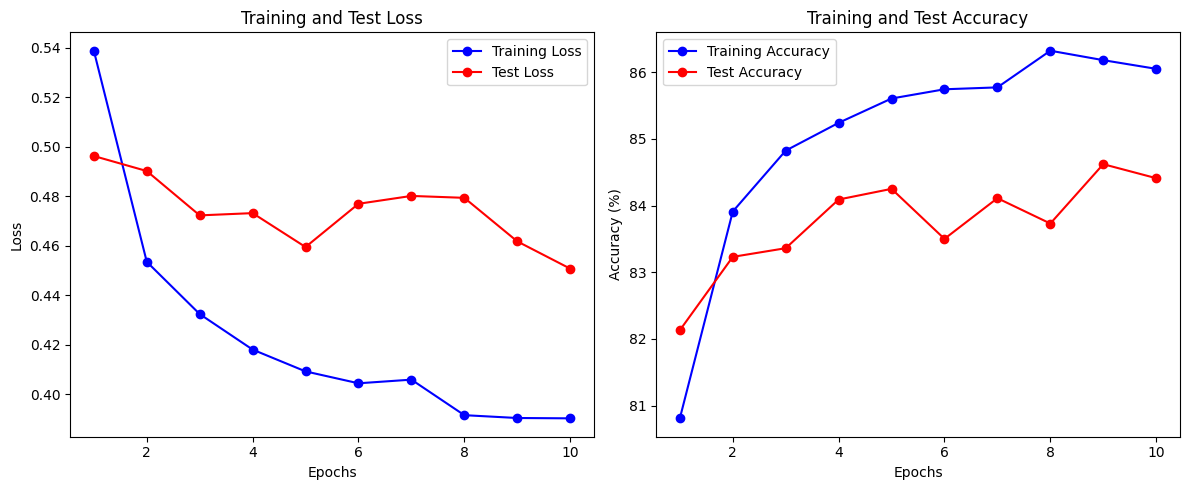

In [ ]:
plot_training_results(train_losses, train_accuracies, test_losses, test_accuracies)
#평가 데이터와 학습데이터 사이의 갭이 클수록 과대적합되었다라고 본다.
#변동이 횡보하면 학습이 안되는중 널뛰기하더라도 내려가면 학습중이다. 2%p정도는 과대적합까지는 아니다.
# 모델이 90퍼센트가 넘어야하는데 못넘었다면 언더피팅이라고 말할 수도 있다. 에폭이 적어서 이모델을 평가하기 조금은 어려울수있다.
# 과대적합의 문제 발생 원인은 모델의 복잡도와 데이터의 양이다...
# 앙상블 여러 모델을 결합해서 사용하는것

---

# 심층신경망 모델 성능 개선 방법

## Dropout

In [ ]:
# 신경망 모델 정의 (Dropout 포함)
class FashionMNISTDropoutModel(nn.Module):
    def __init__(self):
        super(FashionMNISTDropoutModel, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 10)
        self.dropout = nn.Dropout(0.5)  # 10%의 드롭아웃 적용
        # 50%의 드롭아웃 적용

    def forward(self, x):
        x = self.flatten(x)
        x = torch.relu(self.fc1(x))
        # 첫 번째 은닉층 뒤에 드롭아웃 적용
        x = self.dropout(x)  # 드롭아웃 적용

        x = self.fc2(x)
        return x

# 모델 인스턴스화
model = FashionMNISTDropoutModel().to(device)
summary(model, (10, 1, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
FashionMNISTDropoutModel                 [10, 10]                  --
├─Flatten: 1-1                           [10, 784]                 --
├─Linear: 1-2                            [10, 128]                 100,480
├─Dropout: 1-3                           [10, 128]                 --
├─Linear: 1-4                            [10, 10]                  1,290
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
Total mult-adds (M): 1.02
Input size (MB): 0.03
Forward/backward pass size (MB): 0.01
Params size (MB): 0.41
Estimated Total Size (MB): 0.45

In [ ]:
# 손실 함수와 옵티마이저 설정
criterion = nn.CrossEntropyLoss()  # 다중 클래스 분류를 위한 손실 함수
optimizer = optim.Adam(model.parameters(), lr=0.01)  # Adam 옵티마이저

train_losses, train_accuracies, test_losses, test_accuracies = train_and_evaluate(
    model, train_loader, test_loader, criterion, optimizer, num_epochs=10, device=device
)

Epoch [1]
Train Loss: 0.8884, Train Accuracy: 67.97%
Test Loss: 0.6077, Test Accuracy: 77.14%
Epoch [2]
Train Loss: 0.8314, Train Accuracy: 69.88%
Test Loss: 0.5728, Test Accuracy: 80.27%
Epoch [3]
Train Loss: 0.8416, Train Accuracy: 69.91%
Test Loss: 0.6025, Test Accuracy: 80.59%
Epoch [4]
Train Loss: 0.8145, Train Accuracy: 70.93%
Test Loss: 0.5704, Test Accuracy: 79.66%
Epoch [5]
Train Loss: 0.8330, Train Accuracy: 70.31%
Test Loss: 0.5764, Test Accuracy: 80.94%
Epoch [6]
Train Loss: 0.8051, Train Accuracy: 71.41%
Test Loss: 0.5654, Test Accuracy: 81.03%
Epoch [7]
Train Loss: 0.8584, Train Accuracy: 69.82%
Test Loss: 0.6156, Test Accuracy: 77.93%
Epoch [8]
Train Loss: 0.8427, Train Accuracy: 70.33%
Test Loss: 0.5902, Test Accuracy: 80.41%
Epoch [9]
Train Loss: 0.8324, Train Accuracy: 70.47%
Test Loss: 0.5718, Test Accuracy: 81.10%
Epoch [10]
Train Loss: 0.8277, Train Accuracy: 70.92%
Test Loss: 0.6108, Test Accuracy: 78.50%


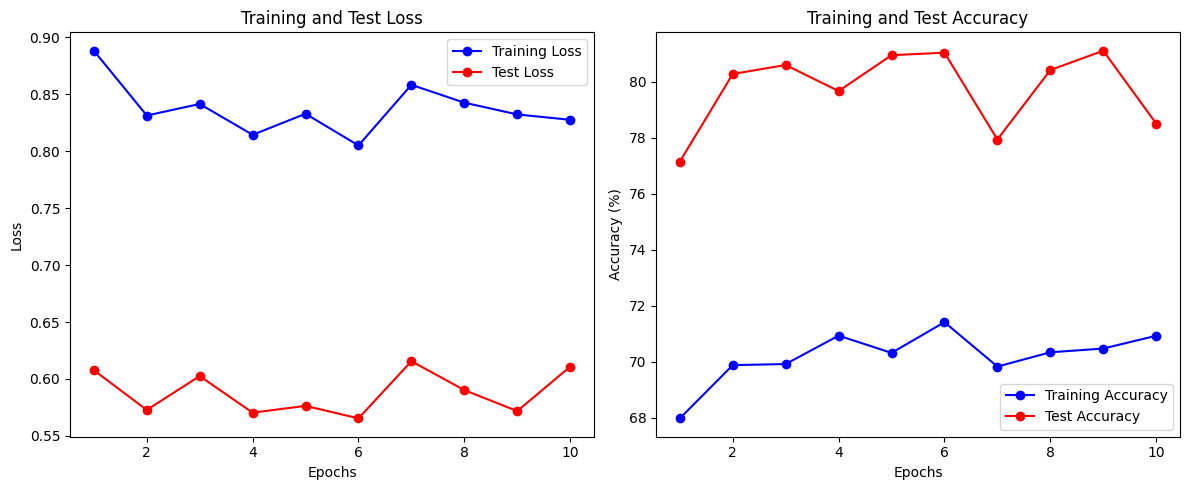

In [ ]:
plot_training_results(train_losses, train_accuracies, test_losses, test_accuracies)

## BatchNormalization

In [ ]:
# 신경망 모델 정의 (Batch Normalization 및 Dropout 포함)
class FashionMNISTBNModel(nn.Module):
    def __init__(self):
        super(FashionMNISTBNModel, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 128)
        # 첫 번째 배치 정규화 레이어
        self.bn1 = nn.BatchNorm1d(128)
        self.fc2 = nn.Linear(128, 10)
        self.dropout = nn.Dropout(0.1)  # 50%의 드롭아웃 적용

    def forward(self, x):
        x = self.flatten(x)
        x = torch.relu(self.bn1(self.fc1(x)))# 첫 번째 배치 정규화 + ReLU
        x = self.dropout(x)  # 드롭아웃 적용
        x = self.fc2(x)
        return x

# 모델 인스턴스화
model = FashionMNISTBNModel().to(device)
summary(model, (10, 1, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
FashionMNISTBNModel                      [10, 10]                  --
├─Flatten: 1-1                           [10, 784]                 --
├─Linear: 1-2                            [10, 128]                 100,480
├─BatchNorm1d: 1-3                       [10, 128]                 256
├─Dropout: 1-4                           [10, 128]                 --
├─Linear: 1-5                            [10, 10]                  1,290
Total params: 102,026
Trainable params: 102,026
Non-trainable params: 0
Total mult-adds (M): 1.02
Input size (MB): 0.03
Forward/backward pass size (MB): 0.02
Params size (MB): 0.41
Estimated Total Size (MB): 0.46

In [ ]:
# 손실 함수와 옵티마이저 설정
criterion = nn.CrossEntropyLoss()  # 다중 클래스 분류를 위한 손실 함수
optimizer = optim.Adam(model.parameters(), lr=0.01)  # Adam 옵티마이저

train_losses, train_accuracies, test_losses, test_accuracies = train_and_evaluate(
    model, train_loader, test_loader, criterion, optimizer, num_epochs=10, device=device
)
#신경망의 인풋으로 들어가는 값의 scale이 너무 크면 잘못 트레이닝할 수 있기때문에 입력값을 안정적으로 만드는 과정 보통 cnn에서 사용함

Epoch [1]
Train Loss: 0.4789, Train Accuracy: 82.57%
Test Loss: 0.4032, Test Accuracy: 85.47%
Epoch [2]
Train Loss: 0.3731, Train Accuracy: 86.41%
Test Loss: 0.3872, Test Accuracy: 85.80%
Epoch [3]
Train Loss: 0.3431, Train Accuracy: 87.57%
Test Loss: 0.3465, Test Accuracy: 87.19%
Epoch [4]
Train Loss: 0.3256, Train Accuracy: 88.13%
Test Loss: 0.3554, Test Accuracy: 87.43%
Epoch [5]
Train Loss: 0.3063, Train Accuracy: 88.65%
Test Loss: 0.3399, Test Accuracy: 87.96%
Epoch [6]
Train Loss: 0.2941, Train Accuracy: 89.03%
Test Loss: 0.3476, Test Accuracy: 87.42%
Epoch [7]
Train Loss: 0.2862, Train Accuracy: 89.37%
Test Loss: 0.3367, Test Accuracy: 87.85%
Epoch [8]
Train Loss: 0.2734, Train Accuracy: 89.88%
Test Loss: 0.3420, Test Accuracy: 88.17%
Epoch [9]
Train Loss: 0.2660, Train Accuracy: 90.01%
Test Loss: 0.3297, Test Accuracy: 88.41%
Epoch [10]
Train Loss: 0.2559, Train Accuracy: 90.44%
Test Loss: 0.3543, Test Accuracy: 87.75%


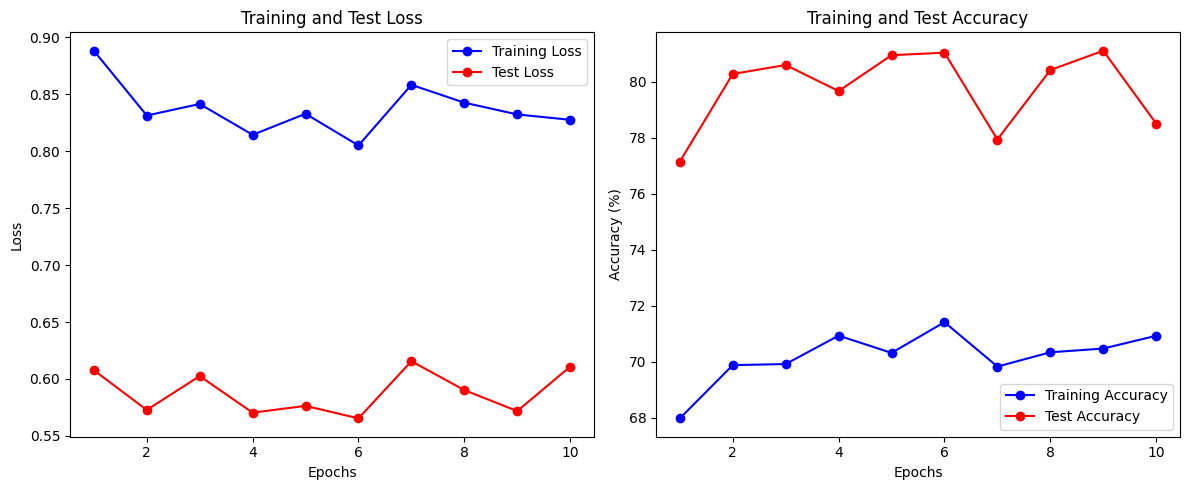

In [ ]:
plot_training_results(train_losses, train_accuracies, test_losses, test_accuracies)

In [ ]:
# 신경망 모델 정의 (Dropout 포함)
class FashionMNISTDropoutModel(nn.Module):
    def __init__(self):
        super(FashionMNISTDropoutModel, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 256)
        self.fc2 = nn.Linear(256, 256)
        self.fc3 = nn.Linear(256, 10)
        self.dropout = nn.Dropout(0.5)
        # 50%의 드롭아웃 적용

    def forward(self, x):
        x = self.flatten(x)
        x = torch.relu(self.fc1(x))
        # 첫 번째 은닉층 뒤에 드롭아웃 적용
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

# 모델 인스턴스화
model = FashionMNISTDropoutModel().to(device)
summary(model, (10, 1, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
FashionMNISTDropoutModel                 [10, 10]                  --
├─Flatten: 1-1                           [10, 784]                 --
├─Linear: 1-2                            [10, 256]                 200,960
├─Dropout: 1-3                           [10, 256]                 --
├─Linear: 1-4                            [10, 256]                 65,792
├─Dropout: 1-5                           [10, 256]                 --
├─Linear: 1-6                            [10, 10]                  2,570
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
Total mult-adds (M): 2.69
Input size (MB): 0.03
Forward/backward pass size (MB): 0.04
Params size (MB): 1.08
Estimated Total Size (MB): 1.15

In [ ]:
# 손실 함수와 옵티마이저 설정
criterion = nn.CrossEntropyLoss()  # 다중 클래스 분류를 위한 손실 함수
optimizer = optim.Adam(model.parameters(), lr=0.01)  # Adam 옵티마이저

train_losses, train_accuracies, test_losses, test_accuracies = train_and_evaluate(
    model, train_loader, test_loader, criterion, optimizer, num_epochs=10, device=device
)
#학습한 데이터만 좋아지는 것이 아닌 학습하지 않은 데이터도 좋아지면 그게 과대적합을 피하고 있구나 로 분석가능.
#드랍아웃 비율이 높고 모델이 너무 단순하면 모델이 학습을 잘 못하는 언더피팅이 될 수 있다.트레이닝과 테스트가 거의 비슷한
# 퍼센트에 그 accuracy가 높게 만드는게 궁극적 목표


Epoch [1]
Train Loss: 1.2167, Train Accuracy: 58.54%
Test Loss: 0.7799, Test Accuracy: 76.52%
Epoch [2]
Train Loss: 1.2464, Train Accuracy: 56.70%
Test Loss: 0.8324, Test Accuracy: 67.69%
Epoch [3]
Train Loss: 1.2032, Train Accuracy: 57.30%
Test Loss: 0.7744, Test Accuracy: 72.29%
Epoch [4]
Train Loss: 1.2480, Train Accuracy: 57.17%
Test Loss: 0.8263, Test Accuracy: 71.77%
Epoch [5]
Train Loss: 1.2511, Train Accuracy: 56.44%
Test Loss: 0.7756, Test Accuracy: 73.50%
Epoch [6]
Train Loss: 1.2687, Train Accuracy: 55.94%
Test Loss: 0.8366, Test Accuracy: 71.80%
Epoch [7]
Train Loss: 1.2442, Train Accuracy: 55.09%
Test Loss: 0.8270, Test Accuracy: 71.62%
Epoch [8]
Train Loss: 1.2543, Train Accuracy: 55.15%
Test Loss: 0.8125, Test Accuracy: 72.69%
Epoch [9]
Train Loss: 1.2667, Train Accuracy: 54.58%
Test Loss: 0.8526, Test Accuracy: 67.11%
Epoch [10]
Train Loss: 1.2691, Train Accuracy: 53.75%
Test Loss: 0.9010, Test Accuracy: 66.67%


In [ ]:
plot_training_results(train_losses, train_accuracies, test_losses, test_accuracies)
# 지금 보고있는 이미지 데이터를 dnn으로 보고있는데 이건 cnn으로 봐야한다
# 이유는 dnn은 위치정보를 받을 수 없다... 차원을 낮춰서 보기 때문 이미지를 마치 바코드 처럼 보게 된다.

## L1 정칙화

In [ ]:
# 모델 인스턴스화
model = FashionMNISTBNModel().to(device)
summary(model, (10, 1, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
FashionMNISTBNModel                      [10, 10]                  --
├─Flatten: 1-1                           [10, 784]                 --
├─Linear: 1-2                            [10, 128]                 100,480
├─BatchNorm1d: 1-3                       [10, 128]                 256
├─Dropout: 1-4                           [10, 128]                 --
├─Linear: 1-5                            [10, 10]                  1,290
Total params: 102,026
Trainable params: 102,026
Non-trainable params: 0
Total mult-adds (M): 1.02
Input size (MB): 0.03
Forward/backward pass size (MB): 0.02
Params size (MB): 0.41
Estimated Total Size (MB): 0.46

In [ ]:
# 손실 함수와 옵티마이저 설정
criterion = nn.CrossEntropyLoss()  # 다중 클래스 분류를 위한 손실 함수
optimizer = optim.Adam(model.parameters(), lr=0.01)  # Adam 옵티마이저

In [ ]:
# L1 정칙화를 포함한 손실 함수
def l1_regularization(model, lambda_l1):
    params = torch.cat([layer.state_dict()['weight'].view(-1) for layer in model.children() if 'weight' in layer.state_dict()])
    l1_norm = torch.norm(params, 1)
    return lambda_l1 * l1_norm

In [ ]:
# 학습 루프 내에서 사용 예시
for images, labels in train_loader:
    optimizer.zero_grad()
    outputs = model(images)
    loss = criterion(outputs, labels)

    # L1 정칙화 추가
    l1_loss = l1_regularization(model, lambda_l1=0.01)
    loss += l1_loss

    loss.backward()
    optimizer.step()

## L2 정칙화

In [ ]:
# L2 정칙화를 위한 옵티마이저 설정 (weight_decay가 L2 정칙화)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, weight_decay=0.001)

---

# 합성곱 신경망

In [ ]:
def conv2d_output_size(input_size, kernel_size, stride=1, padding=0):
    height, width = input_size

    # Convolution 공식 적용
    out_height = (height + 2 * padding - kernel_size) // stride + 1
    out_width = (width + 2 * padding - kernel_size) // stride + 1

    return out_height, out_width

In [ ]:
# 입력 크기 (Height, Width), 커널 크기, 스트라이드, 패딩
output_size = conv2d_output_size((28, 28), 3, 1, 0)
print(f"Output feature map size: {output_size}")

Output feature map size: (26, 26)


In [ ]:
# 입력 크기 (Height, Width), 커널 크기, 스트라이드, 패딩
output_size = conv2d_output_size((28, 28), 3, 1, 1)
print(f"Output feature map size: {output_size}")

Output feature map size: (28, 28)


In [ ]:
# 입력 크기 (Height, Width), 커널 크기, 스트라이드, 패딩
output_size = conv2d_output_size((28, 28), 3, 2, 0)
print(f"Output feature map size: {output_size}")

Output feature map size: (13, 13)


In [ ]:
# 입력 크기 (Height, Width), 커널 크기, 스트라이드, 패딩
output_size = conv2d_output_size((28, 28), 3, 2, 1)
print(f"Output feature map size: {output_size}")

Output feature map size: (14, 14)


## 모델정의

In [ ]:
# CNN 모델 정의
class CNN(nn.Module):
    def __init__(self):
        pass

    def forward(self, x):
        pass

# 모델 요약 출력
model = CNN().to(device)
summary(model, input_size=(64, 1, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
CNN                                      [64, 10]                  --
├─Conv2d: 1-1                            [64, 16, 28, 28]          160
├─MaxPool2d: 1-2                         [64, 16, 14, 14]          --
├─Conv2d: 1-3                            [64, 32, 14, 14]          4,640
├─MaxPool2d: 1-4                         [64, 32, 7, 7]            --
├─Linear: 1-5                            [64, 128]                 200,832
├─Linear: 1-6                            [64, 10]                  1,290
Total params: 206,922
Trainable params: 206,922
Non-trainable params: 0
Total mult-adds (M): 79.17
Input size (MB): 0.20
Forward/backward pass size (MB): 9.70
Params size (MB): 0.83
Estimated Total Size (MB): 10.73

In [ ]:
# 손실 함수와 옵티마이저 설정
criterion = nn.CrossEntropyLoss()  # 다중 클래스 분류를 위한 손실 함수
optimizer = optim.Adam(model.parameters(), lr=0.0001)  # Adam 옵티마이저

train_losses, train_accuracies, test_losses, test_accuracies = train_and_evaluate(
    model, train_loader, test_loader, criterion, optimizer, num_epochs=10, device=device
)

Epoch [1]
Train Loss: 0.7952, Train Accuracy: 74.17%
Test Loss: 0.5392, Test Accuracy: 80.28%
Epoch [2]
Train Loss: 0.4749, Train Accuracy: 83.06%
Test Loss: 0.4594, Test Accuracy: 83.28%
Epoch [3]
Train Loss: 0.4170, Train Accuracy: 85.15%
Test Loss: 0.4219, Test Accuracy: 84.58%
Epoch [4]
Train Loss: 0.3831, Train Accuracy: 86.39%
Test Loss: 0.3927, Test Accuracy: 85.77%
Epoch [5]
Train Loss: 0.3616, Train Accuracy: 87.16%
Test Loss: 0.3701, Test Accuracy: 86.78%
Epoch [6]
Train Loss: 0.3449, Train Accuracy: 87.71%
Test Loss: 0.3618, Test Accuracy: 87.22%
Epoch [7]
Train Loss: 0.3319, Train Accuracy: 88.16%
Test Loss: 0.3568, Test Accuracy: 87.02%
Epoch [8]
Train Loss: 0.3198, Train Accuracy: 88.61%
Test Loss: 0.3388, Test Accuracy: 87.82%
Epoch [9]
Train Loss: 0.3100, Train Accuracy: 89.03%
Test Loss: 0.3358, Test Accuracy: 88.23%
Epoch [10]
Train Loss: 0.3013, Train Accuracy: 89.19%
Test Loss: 0.3258, Test Accuracy: 88.29%


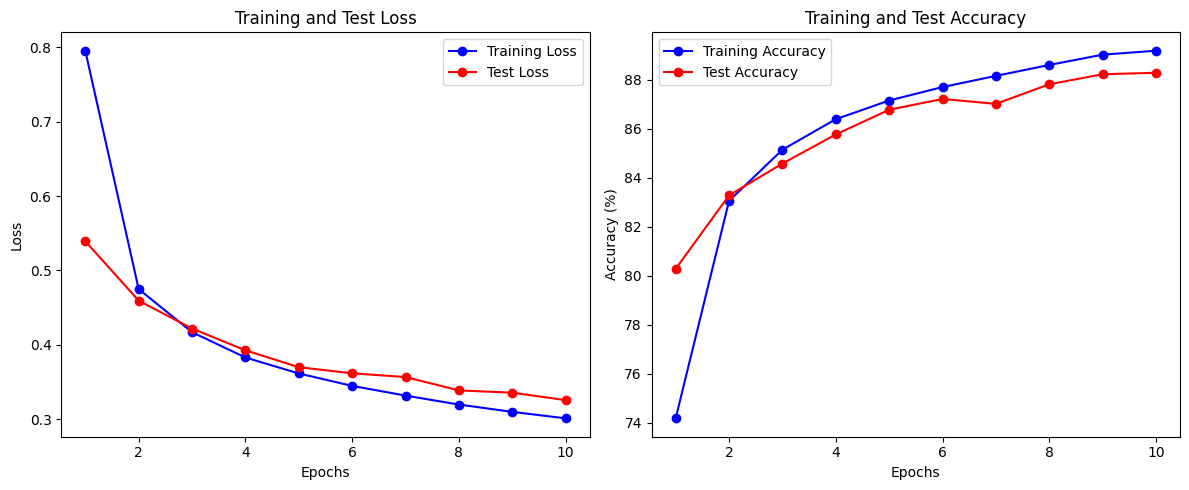

In [ ]:
plot_training_results(train_losses, train_accuracies, test_losses, test_accuracies)

## 전이학습

In [ ]:
# JAEN 패키지에서 CNN 모델 가져오기
from JAEN.models import CNNModel

# CNN 모델 불러오기 (pretrained=True)
model = CNNModel(pretrained=True)

# 모델 정보 확인
summary(model, (64, 1, 28, 28))

Pretrained weights loaded successfully on cuda.


/usr/local/lib/python3.10/dist-packages/JAEN/models.py:55: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.load_state_dict(torch.load(model_path, map_location=device))


Layer (type:depth-idx)                   Output Shape              Param #
CNNModel                                 [64, 10]                  --
├─Sequential: 1-1                        [64, 32, 7, 7]            --
│    └─Conv2d: 2-1                       [64, 16, 28, 28]          160
│    └─ReLU: 2-2                         [64, 16, 28, 28]          --
│    └─Conv2d: 2-3                       [64, 16, 28, 28]          2,320
│    └─ReLU: 2-4                         [64, 16, 28, 28]          --
│    └─MaxPool2d: 2-5                    [64, 16, 14, 14]          --
│    └─Conv2d: 2-6                       [64, 32, 14, 14]          4,640
│    └─ReLU: 2-7                         [64, 32, 14, 14]          --
│    └─Conv2d: 2-8                       [64, 32, 14, 14]          9,248
│    └─ReLU: 2-9                         [64, 32, 14, 14]          --
│    └─MaxPool2d: 2-10                   [64, 32, 7, 7]            --
├─Sequential: 1-2                        [64, 10]                  --
│    

In [ ]:
# 기존 Conv Block 동결


In [ ]:
# 새로운 Fully Connected Block 설정


# 디바이스 설정 (GPU 또는 CPU)
model = model.to(device)
summary(model, input_size=(64, 1, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
CNNModel                                 [64, 10]                  --
├─Sequential: 1-1                        [64, 32, 7, 7]            --
│    └─Conv2d: 2-1                       [64, 16, 28, 28]          (160)
│    └─ReLU: 2-2                         [64, 16, 28, 28]          --
│    └─Conv2d: 2-3                       [64, 16, 28, 28]          (2,320)
│    └─ReLU: 2-4                         [64, 16, 28, 28]          --
│    └─MaxPool2d: 2-5                    [64, 16, 14, 14]          --
│    └─Conv2d: 2-6                       [64, 32, 14, 14]          (4,640)
│    └─ReLU: 2-7                         [64, 32, 14, 14]          --
│    └─Conv2d: 2-8                       [64, 32, 14, 14]          (9,248)
│    └─ReLU: 2-9                         [64, 32, 14, 14]          --
│    └─MaxPool2d: 2-10                   [64, 32, 7, 7]            --
├─Sequential: 1-2                        [64, 10]                  

In [ ]:
# 손실 함수와 최적화 도구 정의
criterion = nn.CrossEntropyLoss()
optimizer =

train_losses, train_accuracies, test_losses, test_accuracies = train_and_evaluate(
    model, train_loader, test_loader, criterion, optimizer, num_epochs=10, device=device
)

Epoch [1]
Train Loss: 0.8642, Train Accuracy: 72.46%
Test Loss: 0.5218, Test Accuracy: 82.39%
Epoch [2]
Train Loss: 0.5486, Train Accuracy: 81.45%
Test Loss: 0.4504, Test Accuracy: 84.61%
Epoch [3]
Train Loss: 0.4832, Train Accuracy: 83.75%
Test Loss: 0.4170, Test Accuracy: 85.67%
Epoch [4]
Train Loss: 0.4468, Train Accuracy: 84.83%
Test Loss: 0.3959, Test Accuracy: 86.23%
Epoch [5]
Train Loss: 0.4207, Train Accuracy: 85.81%
Test Loss: 0.3806, Test Accuracy: 86.71%
Epoch [6]
Train Loss: 0.3993, Train Accuracy: 86.42%
Test Loss: 0.3705, Test Accuracy: 87.03%
Epoch [7]
Train Loss: 0.3848, Train Accuracy: 86.84%
Test Loss: 0.3620, Test Accuracy: 87.42%
Epoch [8]
Train Loss: 0.3755, Train Accuracy: 87.05%
Test Loss: 0.3551, Test Accuracy: 87.45%
Epoch [9]
Train Loss: 0.3651, Train Accuracy: 87.42%
Test Loss: 0.3504, Test Accuracy: 87.61%
Epoch [10]
Train Loss: 0.3559, Train Accuracy: 87.70%
Test Loss: 0.3435, Test Accuracy: 87.78%


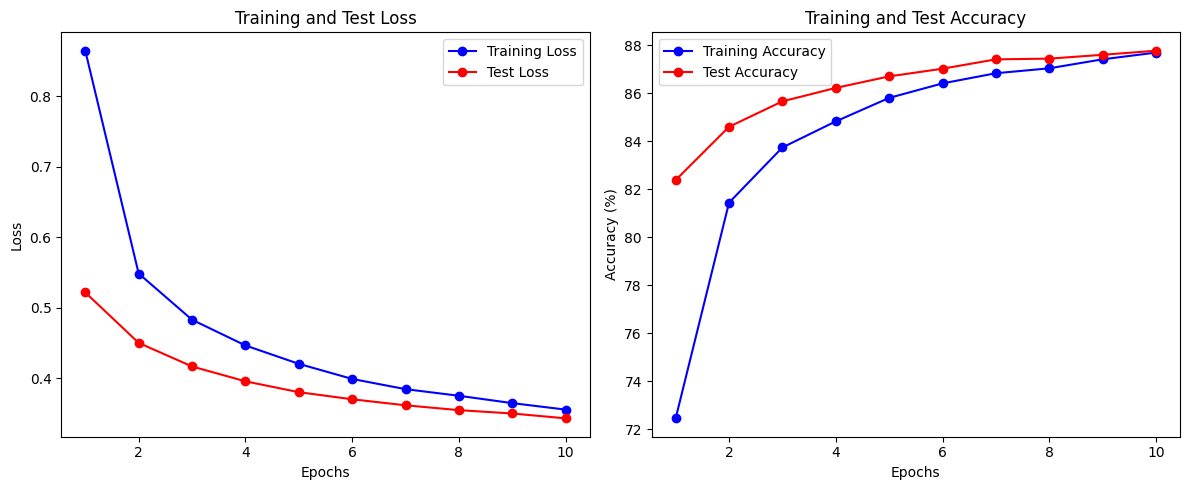

In [ ]:
plot_training_results(train_losses, train_accuracies, test_losses, test_accuracies)

## 미세조정

In [ ]:
# JAEN 패키지에서 CNN 모델 가져오기
from JAEN.models import CNNModel

# CNN 모델 불러오기 (pretrained=True)
model = CNNModel(pretrained=True)

# 모델 정보 확인
summary(model, (64, 1, 28, 28))

Pretrained weights loaded successfully on cuda.


/usr/local/lib/python3.10/dist-packages/JAEN/models.py:55: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.load_state_dict(torch.load(model_path, map_location=device))


Layer (type:depth-idx)                   Output Shape              Param #
CNNModel                                 [64, 10]                  --
├─Sequential: 1-1                        [64, 32, 7, 7]            --
│    └─Conv2d: 2-1                       [64, 16, 28, 28]          160
│    └─ReLU: 2-2                         [64, 16, 28, 28]          --
│    └─Conv2d: 2-3                       [64, 16, 28, 28]          2,320
│    └─ReLU: 2-4                         [64, 16, 28, 28]          --
│    └─MaxPool2d: 2-5                    [64, 16, 14, 14]          --
│    └─Conv2d: 2-6                       [64, 32, 14, 14]          4,640
│    └─ReLU: 2-7                         [64, 32, 14, 14]          --
│    └─Conv2d: 2-8                       [64, 32, 14, 14]          9,248
│    └─ReLU: 2-9                         [64, 32, 14, 14]          --
│    └─MaxPool2d: 2-10                   [64, 32, 7, 7]            --
├─Sequential: 1-2                        [64, 10]                  --
│    

In [ ]:
# 기존 Conv Block 동결
for param in model.conv_layers.parameters():
    param.requires_grad = False

In [ ]:
# 새로운 Fully Connected Block 설정
model.fc_layers = nn.Sequential(
    nn.Linear(32 * 7 * 7, 64),  # 첫 번째 은닉층
    nn.ReLU(),
    nn.Dropout(p=0.5),           # 드롭아웃 추가
    nn.Linear(64, 10)           # 출력층 (활성화 함수 없음)
)

# 디바이스 설정 (GPU 또는 CPU)
model = model.to(device)

In [ ]:
# 마지막 두 Conv 레이어만 학습하도록 설정


In [ ]:
summary(model, input_size=(64, 1, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
CNNModel                                 [64, 10]                  --
├─Sequential: 1-1                        [64, 32, 7, 7]            --
│    └─Conv2d: 2-1                       [64, 16, 28, 28]          (160)
│    └─ReLU: 2-2                         [64, 16, 28, 28]          --
│    └─Conv2d: 2-3                       [64, 16, 28, 28]          (2,320)
│    └─ReLU: 2-4                         [64, 16, 28, 28]          --
│    └─MaxPool2d: 2-5                    [64, 16, 14, 14]          --
│    └─Conv2d: 2-6                       [64, 32, 14, 14]          4,640
│    └─ReLU: 2-7                         [64, 32, 14, 14]          --
│    └─Conv2d: 2-8                       [64, 32, 14, 14]          9,248
│    └─ReLU: 2-9                         [64, 32, 14, 14]          --
│    └─MaxPool2d: 2-10                   [64, 32, 7, 7]            --
├─Sequential: 1-2                        [64, 10]                  --
│

In [ ]:
# 손실 함수와 최적화 도구 정의
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.0001)

train_losses, train_accuracies, test_losses, test_accuracies = train_and_evaluate(
    model, train_loader, test_loader, criterion, optimizer, num_epochs=10, device=device
)

Epoch [1]
Train Loss: 0.7505, Train Accuracy: 75.10%
Test Loss: 0.4311, Test Accuracy: 84.82%
Epoch [2]
Train Loss: 0.4687, Train Accuracy: 83.77%
Test Loss: 0.3780, Test Accuracy: 86.55%
Epoch [3]
Train Loss: 0.4172, Train Accuracy: 85.55%
Test Loss: 0.3559, Test Accuracy: 87.18%
Epoch [4]
Train Loss: 0.3847, Train Accuracy: 86.52%
Test Loss: 0.3426, Test Accuracy: 87.48%
Epoch [5]
Train Loss: 0.3646, Train Accuracy: 86.99%
Test Loss: 0.3290, Test Accuracy: 88.29%
Epoch [6]
Train Loss: 0.3455, Train Accuracy: 87.70%
Test Loss: 0.3219, Test Accuracy: 88.27%
Epoch [7]
Train Loss: 0.3336, Train Accuracy: 88.11%
Test Loss: 0.3127, Test Accuracy: 88.60%
Epoch [8]
Train Loss: 0.3219, Train Accuracy: 88.54%
Test Loss: 0.3072, Test Accuracy: 88.91%
Epoch [9]
Train Loss: 0.3114, Train Accuracy: 88.92%
Test Loss: 0.3041, Test Accuracy: 89.10%
Epoch [10]
Train Loss: 0.3026, Train Accuracy: 89.03%
Test Loss: 0.3014, Test Accuracy: 89.21%


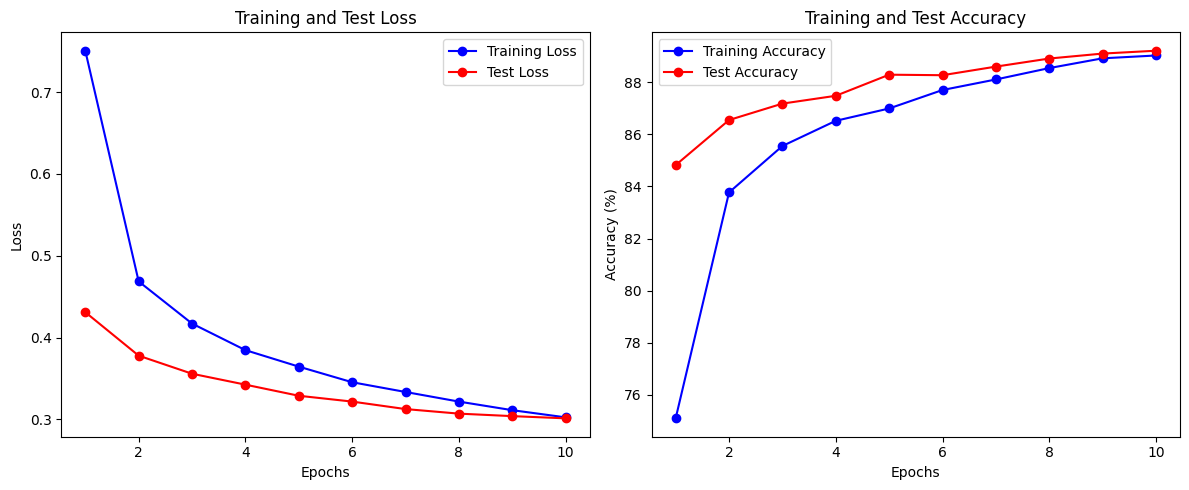

In [ ]:
plot_training_results(train_losses, train_accuracies, test_losses, test_accuracies)